In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df= pd.read_csv('1-studyhours.csv')

In [6]:
df.head()

,Study Hours,Exam Score
0,3.9,40.0
1,9.6,57.1
2,4.5,42.7
3,11.4,65.1
4,14.4,78.7


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Study Hours  33 non-null     float64
 1   Exam Score   33 non-null     float64
dtypes: float64(2)
memory usage: 660.0 bytes


In [8]:
df.describe()

,Study Hours,Exam Score
count,33.000000,33.000000
mean,15.772727,74.612121
std,7.608723,18.711206
min,3.000000,40.000000
25%,9.600000,58.500000
50%,17.400000,78.800000
75%,21.300000,90.800000
max,30.000000,100.000000


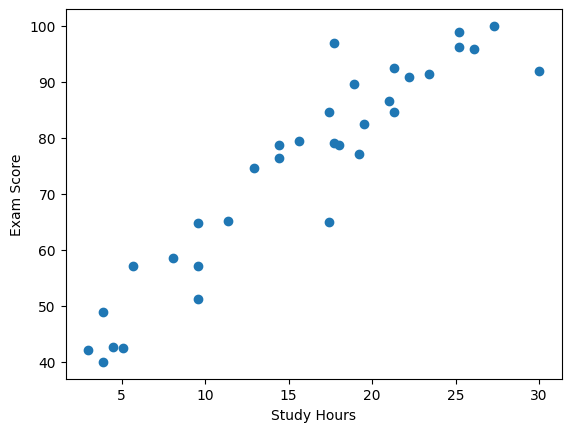

In [9]:
plt.scatter(df["Study Hours"],df["Exam Score"])
plt.xlabel("Study Hours") # independent(bağımlı) değişkenlerimizi genelde x eksenin eyerleştiririz
plt.ylabel("Exam Score")  # dependent (bağımsız) değişkenimizi de y eksenine
plt.show()

genellikle hatta hemen hemen her zaman değişkenlerimiz

X-> independent özellikleri temsil eder  (çoğul olabilir birden fazla özellik '**features**')

y-> dependent(bağımsız) özelliğimizi temsil eder

In [10]:
X=df[["Study Hours"]]# X in DatFrame olması için çift parantez
type(X) # DataFrame

pandas.core.frame.DataFrame

In [11]:
y=df["Exam Score"]
type(y)#--->Series

pandas.core.series.Series

Test-Train Split ==> Burda datasetimizi ikiye bölüyoruz(eşit olması gerekmiyor) ve bır kısmını train için bir kısmını da sonradan eklemek adına Test için kullanırız ki hata oranlarını alabileim yani başta y değerini alırız sonra her test için eklediğimiz veriyi sayesinde de  ŷ yi buluruz ve y-ŷ= bize hata oranını verir

In [12]:
from sklearn.model_selection import train_test_split #### çok önemli bir kütüphane ####3

In [13]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=15)# test_size=0.2 % 20 sini testler için %80 ini train için ayır demek

In [14]:
y_train

,Exam Score
18,64.9
1,57.1
2,42.7
32,89.6
6,77.1
3,65.1
29,82.4
26,64.8
9,84.6
4,78.7


In [15]:
y_test

,Exam Score
25,42.4
14,86.6
30,91.5
16,57.2
24,51.2
20,49.0
19,84.7


**Standardization** standardize the dataset

Burdaki mantık örneğin birden fazla features var mesela ev fiyatı için metrekare önemlidir, dairenin yaşı,lokasyon,belki son satıştaki ettiği değer.Yani sayısal metrikler çok farklı olabilir  bir tanesinin değeri 100 ken diğeri 100000000 değer alabilir böyle olmasın diye ve sonuçta kullanacağımız formüller olacak bu kadar sayısal farklılıklar olursa Gradient Descent(hataları düzeltme ve best fit lineer) i bulmak zor olur

Standardization/Normalization var ==> değişiklikler X üzerinden olacak anlayacğınız

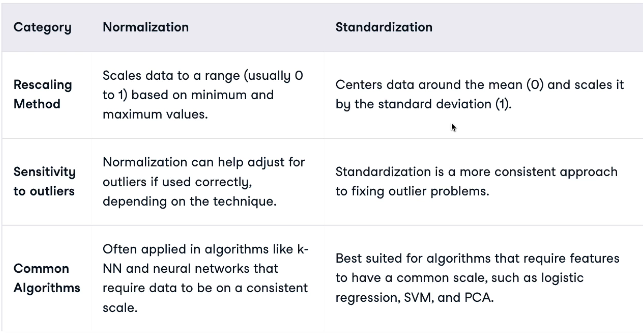

In [16]:
from sklearn.preprocessing import StandardScaler
#balanced feature values
#efficent Gradient Descent
# l1,l2   ==> ceza vermek gibi

In [17]:
scaler= StandardScaler()

In [18]:
X_train

,Study Hours
18,17.4
1,9.6
2,4.5
32,18.9
6,19.2
3,11.4
29,19.5
26,9.6
9,17.4
4,14.4


In [19]:
# Eğitim verisini (X_train) hem 'fit' (ölçekleyiciyi eğit) hem de 'transform' (ölçekle) işlemlerinden geçiriyoruz.
# fit() -> scaler, X_train'in ortalama ve standart sapmasını öğrenir (parametreleri kaydeder).
# transform() -> bu öğrendiği parametrelerle X_train'i ölçekler.
X_train = scaler.fit_transform(X_train)

# Test verisini (X_test) SADECE 'transform' işleminden geçiriyoruz.
# Çünkü test verisinin ortalama/std değerini asla öğrenmemeliyiz (Data Leakage olur).
# Model, test verisini hiç görmemiş gibi değerlendirilmelidir.
# Bu yüzden scaler, X_train'den öğrendiği parametreleri kullanarak X_test'i ölçekler.
X_test = scaler.transform(X_test)

In [20]:
X_train

array([[ 0.11794385],
       [-0.97424848],
       [-1.68837424],
       [ 0.32798083],
       [ 0.36998823],
       [-0.7222041 ],
       [ 0.41199563],
       [-0.97424848],
       [ 0.11794385],
       [-0.30213013],
       [ 0.15995124],
       [ 0.66404001],
       [-0.13410054],
       [ 1.50418796],
       [-0.51216711],
       [ 0.15995124],
       [-0.30213013],
       [ 1.21013618],
       [ 1.33615837],
       [ 0.7900622 ],
       [-1.77238903],
       [-1.89841122],
       [ 0.20195864],
       [ 1.88225453],
       [-1.18428547],
       [ 1.21013618]])

**LinearRegression**

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
regression=LinearRegression()# LinearRegression(n_jobs=-1) yaparsak sistem daha hızlı çalışır ama pc yi yorar o yüzden daha yüksek projelerde yapılır

In [23]:
# Eğitmek için " fit" fonksiyonu kullanılır
regression.fit(X_train,y_train)

LinearRegression()

In [24]:
print("Coefficent:", regression.coef_)
print("Intercept:", regression.intercept_)

Coefficent: [16.17860223]
Intercept: 76.9076923076923


In [25]:
# Demek oluyor ki bu  y=76.91 + 16.18x ama bu demek olmuyor ki 0 saat çalışsak 76 alacaz bursaki sayılar
# Standart Scaler ile Standardization  yaptığımız için böyle

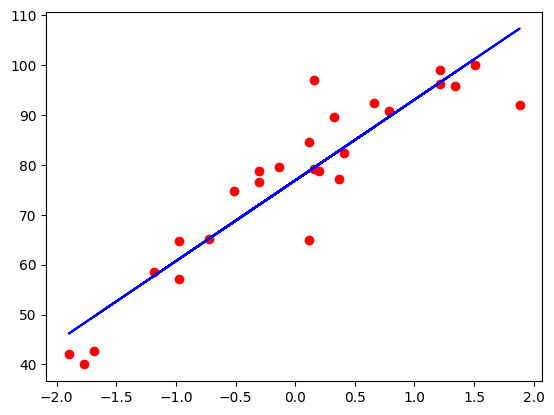

In [26]:
plt.scatter(X_train,y_train,color="red")
plt.plot(X_train,regression.predict(X_train),color="blue") # predict
plt.show()

In [27]:
# X=20 olurs y=?
regression.predict([[20]])# 400 almak imkansız ama neden böyle verdi çnkü standart scaler yapmıştık

array([400.47973694])

In [28]:
scaler.transform([[20]]) # 20 için outputtaki değeri vermemiz gerekiyor

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.48200796]])

In [29]:
regression.predict(scaler.transform([[20]])) # 20 saat ders çalışmış biri 84.71 alır demek

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([84.70590731])

In [30]:
regression.predict(scaler.transform([[0]]))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([39.39784252])

In [31]:
regression.predict(scaler.transform([[10]]))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([62.05187491])

Prediction with test

In [32]:
y_pred_test=regression.predict(X_test)

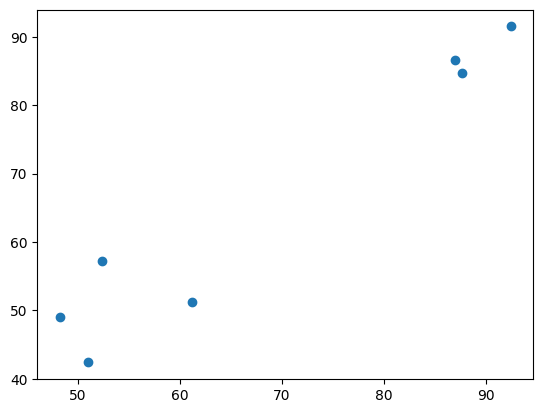

In [33]:
plt.scatter(y_pred_test,y_test) # ne kadar doğrusal bir artış(pozitif korelasyon) varsa o kadar başarılı demektir
plt.show()

In [34]:
from sklearn.metrics import mean_absolute_error ,mean_squared_error ,r2_score  # bunlar hata metrikleri yani başarı düzeyine bakacağız

In [38]:
mae= mean_absolute_error(y_test,y_pred_test)
mse= mean_squared_error(y_test,y_pred_test)        # bunlar daha çok iki farklı modülü test etmekte kullanılır
rmse= np.sqrt(mse) # root mean square error

print("mae:", mae)
print("mse:", mse)
print("rmse:", rmse)


mae: 4.054868128856142
mse: 29.45839048833392
rmse: 5.427558427906043


In [39]:
r2= r2_score(y_test,y_pred_test)
print("r2:", r2)                         # tek modülü kendi içinde başarı testini yapmak içinse bu fonksiyon kullanılır
                                          # 0.92 gayet başarılı

r2: 0.9196596206825491


adjusted R square bu kütüphanede yok o yüzden formülünü bulup yazmamız lazım

In [42]:
# Adjusted R^2
1 - ( 1-r2 ) * ( len(y_test) - 1 ) / ( len(y_test) - X_test.shape[1] - 1 ) # 0.90 gayet başarılı

0.903591544819059

In [41]:
# R² (R-squared) ve Adjusted R²:
#  - 1.0 → mükemmel uyum
#  - 0.7+ → genelde iyi (ama problem türüne bağlı)
#  - 0.5-0.7 → orta düzeyde açıklama gücü
#  - <0.5 → zayıf (özellik mühendisliği veya model iyileştirmesi gerekebilir)
# Not: Sosyal bilimler/karmaşık insan davranışı modellerinde 0.5 bile iyi sayılabilir.
# Adjusted R² yüksekse → eklenen özellikler gerçekten modele katkı sağlamıştır.